# Distance Matrix

In [1]:
# imports
from sklearn import datasets
import numpy as np

In [2]:
# abstract
dataset = datasets.load_iris()

In [3]:
# dictionary
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data = dataset["data"]
# data  # data is a numpy array data structure. Think of it as a matrix of data (or as an excel spreadsheet)

In [6]:
data.shape

(150, 4)

In [7]:
# euclidean distance of 2 observations
p1 = data[50]
p2 = data[100]
sum(((p1 - p2)**2))**(1/2)

1.8439088914585773

In [8]:
# initialize distance matrix. What will be its final shape?
dist = []

In [9]:
# Build the distance matrix. Use 2 for loops, the append list method and the euclidean distance formula
for i in range(data.shape[0]):
    dist_row = []
    for j in range(data.shape[0]):
        single_dist = sum((data[i] - data[j]) ** 2) ** (1/2)
        dist_row.append(single_dist)
    dist.append(dist_row)        

In [10]:
# dist

In [11]:
# another import (usually all imports are done at the top of the script/ notebook)
import seaborn as sns

<AxesSubplot:>

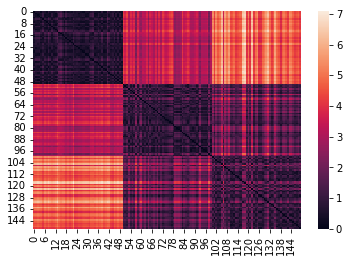

In [12]:
sns.heatmap(dist)

# Plotting data: 
Don't worry about the code as that's not the objective of the exercise and we will learn how to plot data in future classes
### How can we represent an observation in a N-dimensional Space

In [13]:
# another import (usually all imports are done at the top of the script/ notebook)
import matplotlib.pyplot as plt

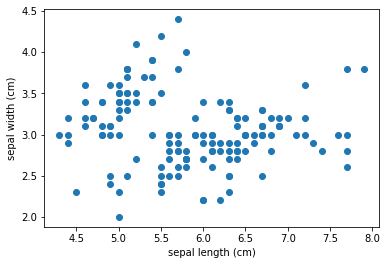

In [14]:
# 2D scatter plot
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel(dataset["feature_names"][0])
plt.ylabel(dataset["feature_names"][1])
plt.show()

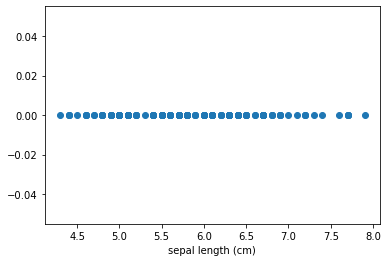

In [15]:
# 1D scatter plot
plt.scatter(data[:, 0], [0 for i in range(data.shape[0])])
plt.xlabel(dataset["feature_names"][0])
plt.show()

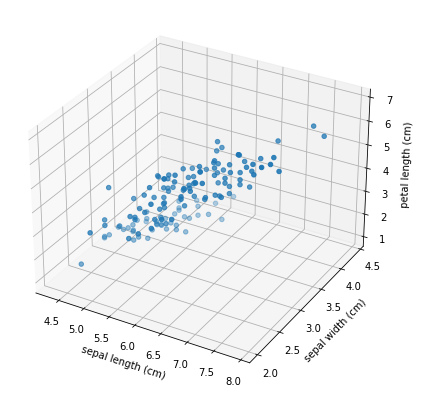

In [17]:
# 3D scatter plot
fig = plt.figure(figsize=(14, 7))  # defining a figure so we can add a 3d subplot
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
ax.set_xlabel(dataset["feature_names"][0])
ax.set_ylabel(dataset["feature_names"][1])
ax.set_zlabel(dataset["feature_names"][2])
plt.show()

## Finding nearest neighbors

### Detailed Explanation of the this exercise:

Let's start off simple. If we want to find the minimum value we use the following code:
***
```python
min_args, min_dist = (None, 9e99)  # initialize these variables outside the loop so their scope is defined globally and we can update and track their values at each iteration.
for id_r, row in enumerate(dist):  # enumerate to not only iterate along the rows of dist but also to keep track of the row index we are at: id_r
    dist_ = min(row)  # minimum distance in the current row
    if dist_ <= min_dist:
        min_dist = dist_  # if the minimum distance of the row is <= the minimum global distance, then we update the later
        min_args = id_r  # and we also are able to know at which row index we found the minimum global distance!
```

Next step. Let's try to additionally find the column index responsible for the minimum global distance. Then, together with the row index we can know which observations are closest together (i.e. have the smallest distance):
***
```python
min_args, min_dist = (None, 9e99)
for id_r, row in enumerate(dist):
    dist_ = min(row)
    if dist_ <= min_dist:
        min_dist = dist_
        for id_c, dist_val in enumerate(row):
            if dist_val == dist_:  # to find the column index responsible for the current minimum global distance we need to iterate along the current row distances and if at a given iteration we find that the corresponding distance is the same as the current minimum global distance, then we know that we the tracked column index id_c is the one responsible for the current minimum global distance
                min_args = (id_r, id_c)
                break  # after finding the column index responsible for the current minimum global distance, we exit the loop as we don't need to search any longer
```
The way we search for the minimum distance and the corresponding observations is explained. However we have to take care of a very important detail. Since the distance matrix is a symmetric and 0-diagonal matrix (distance of the observation with itself is 0) we should only perform the search over either the upper or lower traingle of the matrix. Let's implement this:
***
```python
min_args, min_dist = (None, 9e99)
for id_r, row in enumerate(dist):
    row_relevant = row.copy()[:id_r]  # we define row_relevant as a copy of row that only holds a slice of the values corresponding to the distances in the lower diagonal of the matrix (i.e. excludes value in row corresponding to diagonal and upper triangle as it holds redundant information). We will only look for the minimum distance and the corresponding observations in these values
    dist_ = min(row_relevant) if len(row_relevant)>0 else 9e99  # the if condition ensures we do not call the min() function on an empty list (happens at first iteration when id_r = 0)
    if dist_<=min_dist:
        min_dist = dist_
        for id_c, dist_val in enumerate(row_relevant):
            if dist_val==dist_:
                min_args = (id_r, id_c)
                break
```

Try to figure out what happens in each iteration to see if you understood! (hint: use prints inside the loop to see the values of each variable at each iteration)

In [ ]:
# get variables to save closest neighbors later
min_args, min_dist = (None, 9e99)
for id_r, row in enumerate(dist):
    row_relevant = row.copy()[:id_r]
    dist_ = min(row_relevant) if len(row_relevant)>0 else 9e99
    
    if dist_<=min_dist:
        min_dist = dist_
        for id_c, dist_val in enumerate(row_relevant):
            if dist_val==dist_:
                min_args = (id_r, id_c)
                break

In [ ]:
min_args

In [ ]:
print(data[min_args[0]])
print(data[min_args[1]])
print('minimum distance:\t', min_dist)

## Define functions
Why do we want to define functions in this case?

In [ ]:
def distance_matrix(data):
    dist = []
    # Build the distance matrix. Use 2 for loops, the append list method and the euclidean distance formula
    for i in range(data.shape[0]):
        dist_row = []
        for j in range(data.shape[0]):
            single_dist = sum((data[i] - data[j]) ** 2) ** 1/2
            dist_row.append(single_dist)
        dist.append(dist_row)    
    return dist    

def closest_points(dist_matrix):
    # get variables to save closest neighbors later
    min_args, min_dist = (None, 9e99)
    for id_r, row in enumerate(dist_matrix):
        row_ = row.copy()[:id_r]
        dist = min(row_) if len(row_)>0 else 9e99
        # check if the row's min distance is the lowest distance found so far
        if dist<=min_dist:
            # save points' ids and their distance
            min_dist = dist 
            for id_diag, dist_val in enumerate(row_):
                if dist_val==dist:
                    min_args = (id_diag, id_r)
                    break
    return min_args, min_dist

## Finding the `n` shortest distances

In [ ]:
dist_matrix = distance_matrix(data)
n_distances = 10

distances = []
for _ in range(n_distances):
    c_points = closest_points(dist_matrix)
    dist_matrix[c_points[0][1]][c_points[0][0]] = 9e99  # Increasing shortest distance value to find the next shortest distance
    distances.append(c_points)

distances